<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Reinforcement/settings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning Codes


# RL Environments

Reinforcement Learning requires well-defined environments that provide a structured interface between agents and the world they're learning to navigate. These environments implement the Markov Decision Process (MDP) framework, providing:

- **State space**: The set of all possible situations the agent can be in
- **Action space**: The set of all possible actions the agent can take
- **Transition function**: How actions change the state
- **Reward function**: Feedback signal indicating action quality

Below are several popular environment frameworks for different RL use cases, from simple grid worlds to complex 3D simulations.

### Gymnasium (formerly OpenAI Gym)

Gymnasium is the standard API for reinforcement learning environments, offering a wide range of pre-built environments from simple control tasks to Atari games.

**Key features:**
- Standard interface (reset, step, render) across all environments
- Supports both discrete and continuous action spaces
- Includes classic control problems, box2d physics, Atari games, and more
- Active community and extensive documentation

**Best for:** Beginners and standard benchmarking tasks

```python
import gymnasium as gym

# Create an environment
env = gym.make('CartPole-v1')

# Reset the environment to get initial state
observation, info = env.reset()

for t in range(1000):
    # Render the environment (in notebooks, use a different rendering approach)
    env.render()
    
    # Select a random action
    action = env.action_space.sample()
    
    # Take the action and observe the result
    observation, reward, terminated, truncated, info = env.step(action)
    
    # Check if episode has ended
    if terminated or truncated:
        observation, info = env.reset()

# Close the environment
env.close()
```

### PettingZoo

PettingZoo is a multi-agent version of Gymnasium that allows for training multiple agents in competitive, cooperative, or mixed scenarios.

**Key features:**
- Similar API to Gymnasium but extended for multi-agent settings
- Supports turn-based, agent-based, and parallel action execution
- Includes environments across several domains: Atari, classic board games, MPE, etc.

**Best for:** Multi-agent reinforcement learning research

```python
from pettingzoo.butterfly import knights_archers_zombies_v10
import numpy as np

env = knights_archers_zombies_v10.parallel_env()
observations = env.reset()

# Dictionary to store actions for each agent
actions = {agent: None for agent in env.agents}

for agent in env.agents:
    action = env.action_space(agent).sample()  # Random action for each agent
    actions[agent] = action

observations, rewards, terminations, truncations, infos = env.step(actions)
```

### DeepMind Control Suite

The DeepMind Control Suite provides a set of challenging continuous control tasks with standardized structure and defaults.

**Key features:**
- Physics-based environments using MuJoCo physics engine
- Highly customizable tasks with procedural generation
- Clean, consistent design across environments

**Best for:** Research on continuous control problems and robotics

```python
from dm_control import suite
import numpy as np
import matplotlib.pyplot as plt

# Load a task (environment)
env = suite.load(domain_name="cartpole", task_name="swingup")

# Define a simple agent
def random_agent(time_step):
    return np.random.uniform(-1, 1, size=env.action_spec().shape)

# Run an episode and capture frames
frames = []
time_step = env.reset()
while not time_step.last():
    action = random_agent(time_step)
    time_step = env.step(action)
    # Render and store frame
    pixels = env.physics.render(camera_id=0)
    frames.append(pixels)
```

### Unity ML-Agents

Unity ML-Agents allows you to create, train, and deploy RL models in rich 3D environments built with the Unity game engine.

**Key features:**
- Integration with the Unity game engine for realistic 3D environments
- Supports curriculum learning, imitation learning, and neural evolution
- Can train with PPO, SAC, or custom algorithms
- Environments can be exported as standalone applications

**Best for:** Game AI, complex visual scenes, and industrial simulations

```python
from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.side_channel.engine_configuration_channel import EngineConfigurationChannel

# Setup communication channel with Unity
channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name="3DBall", side_channels=[channel])
env.reset()

# Get the behavior name and spec
behavior_name = list(env.behavior_specs.keys())[0]
spec = env.behavior_specs[behavior_name]

# Run for a few steps
for i in range(10):
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    action = spec.action_spec.random_action(len(decision_steps))
    env.set_actions(behavior_name, action)
    env.step()
```

### Custom Environments

You can also create custom environments by implementing the Gymnasium interface for your specific problem domain.

**Key features:**
- Complete control over environment dynamics
- Can integrate with domain-specific simulators or data sources
- Compatible with standard RL algorithms and libraries

**Best for:** Specialized domains, real-world applications, and novel research problems

```python
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class CustomEnv(gym.Env):
    """Custom Environment that follows gym interface"""
    metadata = {'render_modes': ['human', 'rgb_array'], 'render_fps': 30}

    def __init__(self, render_mode=None):
        super(CustomEnv, self).__init__()
        # Define action and observation space
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)
        self.render_mode = render_mode
        
    def step(self, action):
        # Execute action and return new state, reward, etc.
        observation = np.array([0.5, 0.5, 0.5])  # Example observation
        reward = 1.0 if action == 1 else 0.0     # Example reward logic
        terminated = False                        # Episode end condition
        truncated = False                         # Early termination flag
        info = {}                                 # Additional information
        return observation, reward, terminated, truncated, info
        
    def reset(self, seed=None, options=None):
        # Reset environment to initial state
        super().reset(seed=seed)
        observation = np.array([0.5, 0.5, 0.5])  # Initial observation
        info = {}                                 # Additional info
        return observation, info
        
    def render(self):
        # Implement visualization logic here
        if self.render_mode == 'human':
            # Render to a window for human viewing
            pass
        elif self.render_mode == 'rgb_array':
            # Return RGB array for programmatic viewing
            return np.zeros((300, 300, 3), dtype=np.uint8)
```

# RL Frameworks

Reinforcement learning frameworks provide implementations of key algorithms, utilities for training, and tools for deployment. The right framework can significantly speed up development and improve results. Here's a comparison of popular RL libraries, each with its strengths and ideal use cases.

## Comparison of Popular RL Frameworks

| Framework | Base Library | Algorithms | Strengths | Best For |
|-----------|-------------|------------|-----------|----------|
| Stable Baselines 3 | PyTorch | DQN, PPO, SAC, TD3, A2C | Reliability, documentation | Production & research |
| HuggingFace RL | PyTorch | PPO, DQN | NLP integration | RLHF & LLM fine-tuning |
| Ray RLlib | PyTorch/TF | 20+ algorithms | Scalability, distributed | Large-scale training |
| CleanRL | PyTorch | DQN, PPO, etc. | Simplicity, education | Learning & customization |
| Tianshou | PyTorch | DQN, PPO, SAC, etc. | Modularity, flexibility | Research & experimentation |

### Stable Baselines 3 (SB3)

Stable Baselines 3 is a set of reliable implementations of reinforcement learning algorithms in PyTorch, designed for both research and production use.

**Key features:**
- Well-tested, documented implementations of standard algorithms
- Comprehensive logging and visualization tools
- Standardized interfaces for environments and policies
- Callback system for monitoring and controlling training

```python
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback

# Create and wrap the environment
env = gym.make('CartPole-v1')
env = Monitor(env)  # Adds episode stats

# Create evaluation environment
eval_env = gym.make('CartPole-v1')
eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/',
                            log_path='./logs/', eval_freq=500,
                            deterministic=True, render=False)

# Initialize agent with custom parameters
model = PPO('MlpPolicy', env, verbose=1, 
           learning_rate=0.0003,
           n_steps=2048,
           batch_size=64,
           n_epochs=10,
           gamma=0.99,
           gae_lambda=0.95,
           clip_range=0.2)

# Train the agent with callbacks
model.learn(total_timesteps=25000, callback=eval_callback)

# Save and load the model
model.save('ppo_cartpole')
model = PPO.load('ppo_cartpole')

# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f'Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}')

# Test the agent
obs, info = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    env.render()
    if terminated or truncated:
        obs, info = env.reset()
```

### HuggingFace RL

HuggingFace provides RL libraries and integrations focusing on deep reinforcement learning and its applications to natural language processing.

**Key features:**
- Specialized for Reinforcement Learning from Human Feedback (RLHF)
- Tight integration with transformer models
- Tools for reward modeling and preference learning

```python
# Example: Training a model with PPO for text generation
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from transformers import PPOConfig, PPOTrainer
from trl import PPOModel, create_reference_model
from trl.core import respond_to_batch

# Load pretrained model and tokenizer
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model_ref = create_reference_model(model)

# Create a PPO config
ppo_config = PPOConfig(batch_size=1, mini_batch_size=1)

# Create the PPO model and trainer
ppo_model = PPOModel(model=model, ref_model=model_ref, tokenizer=tokenizer)
ppo_trainer = PPOTrainer(ppo_config, ppo_model, tokenizer=tokenizer)

# Define reward model (simplified)
def get_reward(responses):
    """Return higher rewards for longer responses as an example"""
    return [min(len(r.split()), 10) / 10.0 for r in responses]

# Training loop
for epoch in range(5):
    # Generate query prompts
    query_tensors = tokenizer(["Write a poem about AI:"], return_tensors="pt").input_ids
    
    # Get model responses
    response_tensors = respond_to_batch(model, query_tensors, tokenizer)
    rewards = get_reward(tokenizer.batch_decode(response_tensors))
    
    # Run PPO step
    stats = ppo_trainer.step(query_tensors, response_tensors, rewards)
    print(f"Epoch {epoch}, mean reward: {stats['ppo/mean_reward']}")
```

### Ray RLlib

Ray RLlib is an open-source library for reinforcement learning that offers high scalability and a unified API for various RL algorithms.

**Key features:**
- Distributed training across multiple CPUs/GPUs/machines
- Extensive algorithm support (20+ algorithms)
- Integration with Ray Tune for hyperparameter tuning
- Support for multi-agent environments

```python
import ray
from ray import tune
from ray.rllib.algorithms.ppo import PPOConfig
from ray.tune.registry import register_env
import gymnasium as gym

# Initialize Ray
ray.init()

# Define a custom environment creator function
def env_creator(env_config):
    return gym.make('CartPole-v1')

# Register the environment
register_env("cartpole", env_creator)

# Configure the algorithm
config = (
    PPOConfig()
    .environment("cartpole")
    .rollouts(num_rollout_workers=2)
    .resources(num_gpus=0)
    .training(model={"fcnet_hiddens": [64, 64]})
    .framework("torch")
)

# Create the trainer
algo = config.build()

# Train the agent
for i in range(10):
    result = algo.train()
    print(f"Iteration {i}: reward = {result['episode_reward_mean']}")

# Save the trained policy
checkpoint_dir = algo.save()
print(f"Checkpoint saved at {checkpoint_dir}")

# Use Ray Tune for hyperparameter optimization
tune_config = (
    PPOConfig()
    .environment("cartpole")
    .rollouts(num_rollout_workers=2)
    .training(lr=tune.grid_search([0.01, 0.001, 0.0001]))
    .framework("torch")
)

analysis = tune.run(
    "PPO",
    config=tune_config.to_dict(),
    stop={"training_iteration": 10},
    num_samples=1,
)

# Get best configuration
best_config = analysis.get_best_config(metric="episode_reward_mean")
print(f"Best learning rate found: {best_config['lr']}")
```

### CleanRL

CleanRL provides single-file implementations of RL algorithms, making them easy to understand and modify.

**Key features:**
- Educational focus with clean, well-documented code
- Single file per algorithm (no dependencies between files)
- Compatible with Weights & Biases for experiment tracking
- Minimalistic approach

```python
# Example PPO implementation (simplified)
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.distributions import Categorical

# Create environment
env = gym.make('CartPole-v1')

# Define actor-critic network
class ActorCritic(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.shared = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh()
        )
        self.actor = nn.Linear(64, output_dim)
        self.critic = nn.Linear(64, 1)
    
    def forward(self, x):
        x = self.shared(x)
        return self.actor(x), self.critic(x)
        
    def get_action(self, x, action=None):
        logits, value = self.forward(x)
        probs = torch.softmax(logits, dim=-1)
        dist = Categorical(probs)
        if action is None:
            action = dist.sample()
        log_prob = dist.log_prob(action)
        entropy = dist.entropy().mean()
        return action, log_prob, entropy, value

# Simplified training loop (conceptual)
model = ActorCritic(env.observation_space.shape[0], env.action_space.n)
optimizer = optim.Adam(model.parameters(), lr=3e-4)

# Collect experience and update model...
```

### Tianshou

Tianshou is a reinforcement learning platform based on PyTorch with elegant API design and high modularity.

**Key features:**
- Vectorized environment support for parallel processing
- Fine-grained control over data collection and processing
- Composable policy structures for complex algorithms
- Extensive support for offline RL (learning from datasets)

```python
import gymnasium as gym
import torch
import numpy as np
from torch import nn
from tianshou.data import Collector, VectorReplayBuffer
from tianshou.env import DummyVectorEnv
from tianshou.policy import DQNPolicy
from tianshou.trainer import offpolicy_trainer
from tianshou.utils.net.common import Net

# Create vectorized environments for parallel processing
env = gym.make('CartPole-v1')
train_envs = DummyVectorEnv([lambda: gym.make('CartPole-v1') for _ in range(10)])
test_envs = DummyVectorEnv([lambda: gym.make('CartPole-v1') for _ in range(3)])

# Create neural network architecture
state_shape = env.observation_space.shape or env.observation_space.n
action_shape = env.action_space.shape or env.action_space.n
net = Net(state_shape, action_shape, hidden_sizes=[128, 128, 128])
optim = torch.optim.Adam(net.parameters(), lr=1e-3)

# Define policy
policy = DQNPolicy(
    model=net,
    optim=optim,
    discount_factor=0.99,
    estimation_step=3,
    target_update_freq=320
)

# Create data collectors with replay buffer
buffer = VectorReplayBuffer(20000, 10)
train_collector = Collector(policy, train_envs, buffer)
test_collector = Collector(policy, test_envs)

# Pre-collect data for better initial performance
train_collector.collect(n_step=1000)

# Train policy
result = offpolicy_trainer(
    policy=policy,
    train_collector=train_collector,
    test_collector=test_collector,
    max_epoch=10,           # total epochs for training
    step_per_epoch=1000,    # steps per epoch
    step_per_collect=10,    # steps per data collection
    update_per_step=0.1,    # gradient updates per step
    episode_per_test=100,   # test episodes per evaluation
    batch_size=64,          # batch size for updating
    train_fn=lambda epoch, env_step: policy.set_eps(0.1),  # train function hook
    test_fn=lambda epoch, env_step: policy.set_eps(0.05),  # test function hook
    stop_fn=lambda mean_reward: mean_reward >= 195,        # early stopping
)

print(f"Finished training with reward: {result['best_reward']}")

# Save the policy
torch.save(policy.state_dict(), 'dqn_cartpole.pth')

# Testing loop
policy.eval()
policy.set_eps(0.05)
collector = Collector(policy, env)
collector.collect(n_episode=1, render=1/60)
```

## Q-Learning 

In [11]:
# Interactive Q-Learning Visualization with Parameter Tuning
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

class SimpleGridWorld:
    def __init__(self, size=4):
        self.size = size
        self.states = size * size
        self.actions = 4  # Up, Right, Down, Left
        
        # Define rewards: all 0 except goal state (bottom-right) which is +1
        self.rewards = np.zeros((size, size))
        self.rewards[size-1, size-1] = 1
        
        # Define some obstacles
        self.obstacles = [(1, 1), (1, 2)]
        for i, j in self.obstacles:
            self.rewards[i, j] = -1
            
        self.terminal_states = [(size-1, size-1)]
        self.current_state = (0, 0)
    
    def reset(self):
        self.current_state = (0, 0)
        return self._state_to_index(self.current_state)
    
    def step(self, action):
        # 0: Up, 1: Right, 2: Down, 3: Left
        i, j = self.current_state
        if action == 0 and i > 0:  # Up
            i -= 1
        elif action == 1 and j < self.size - 1:  # Right
            j += 1
        elif action == 2 and i < self.size - 1:  # Down
            i += 1
        elif action == 3 and j > 0:  # Left
            j -= 1
            
        # Check if it's an obstacle
        if (i, j) in self.obstacles:
            return self._state_to_index(self.current_state), -0.1, False
            
        self.current_state = (i, j)
        reward = self.rewards[i, j]
        done = self.current_state in self.terminal_states
        
        return self._state_to_index(self.current_state), reward, done
    
    def _state_to_index(self, state):
        return state[0] * self.size + state[1]
    
    def _index_to_state(self, index):
        return (index // self.size, index % self.size)

def q_learning_with_params(alpha=0.1, gamma=0.9, epsilon=0.1, episodes=100):
    env = SimpleGridWorld()
    q_table = np.zeros((env.states, env.actions))
    all_rewards = []
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        
        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = np.random.randint(env.actions)
            else:
                action = np.argmax(q_table[state])
                
            next_state, reward, done = env.step(action)
            total_reward += reward
            
            # Q-learning update
            best_next_action = np.argmax(q_table[next_state])
            q_table[state, action] += alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])
            
            state = next_state
        
        all_rewards.append(total_reward)
    
    return q_table, all_rewards

def visualize_policy(q_table, size=4):
    policy = np.argmax(q_table.reshape(size, size, 4), axis=2)
    arrows = ['↑', '→', '↓', '←']
    
    fig, ax = plt.subplots(figsize=(8, 8))
    # Invert y-axis to make (0,0) the top-left corner, matching the grid world coordinates
    ax.invert_yaxis()
    
    for i in range(size):
        for j in range(size):
            if (i, j) in [(1, 1), (1, 2)]:  # obstacles
                ax.text(j + 0.5, i + 0.5, 'X', ha='center', va='center', fontsize=20)
            elif (i, j) == (size-1, size-1):  # goal
                ax.text(j + 0.5, i + 0.5, 'G', ha='center', va='center', fontsize=20)
            else:
                ax.text(j + 0.5, i + 0.5, arrows[policy[i, j]], ha='center', va='center', fontsize=20)
    
    # Grid lines
    for i in range(size + 1):
        ax.axhline(i, color='black', linewidth=1)
        ax.axvline(i, color='black', linewidth=1)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Learned Policy (Arrows indicate best action)')
    plt.tight_layout()
    return fig

def plot_rewards(rewards):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(rewards)
    ax.set_title('Rewards per Episode')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Total Reward')
    ax.grid(True)
    plt.tight_layout()
    return fig

def interactive_q_learning():
    alpha_slider = widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Learning Rate:')
    gamma_slider = widgets.FloatSlider(value=0.9, min=0.1, max=0.99, step=0.01, description='Discount:')
    epsilon_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='Epsilon:')
    episodes_slider = widgets.IntSlider(value=100, min=10, max=500, step=10, description='Episodes:')
    
    run_button = widgets.Button(description='Run Q-Learning')
    output = widgets.Output()
    
    def on_button_clicked(b):
        with output:
            output.clear_output()
            print(f"Running Q-Learning with: α={alpha_slider.value}, γ={gamma_slider.value}, ε={epsilon_slider.value}, episodes={episodes_slider.value}")
            q_table, rewards = q_learning_with_params(
                alpha=alpha_slider.value, 
                gamma=gamma_slider.value, 
                epsilon=epsilon_slider.value, 
                episodes=episodes_slider.value
            )
            
            # Plot policy
            fig1 = visualize_policy(q_table)
            plt.show(fig1)
            
            # Plot rewards
            fig2 = plot_rewards(rewards)
            plt.show(fig2)
    
    run_button.on_click(on_button_clicked)
    
    controls = widgets.VBox([alpha_slider, gamma_slider, epsilon_slider, episodes_slider, run_button])
    display(widgets.VBox([controls, output]))

# Run the interactive visualization
interactive_q_learning()

# Policy Gradient

Episode 0, Average Return: 0.40
Episode 50, Average Return: 0.88
Episode 50, Average Return: 0.88
Episode 100, Average Return: 0.99
Episode 100, Average Return: 0.99
Episode 150, Average Return: 1.00
Episode 150, Average Return: 1.00
Episode 200, Average Return: 1.00
Episode 200, Average Return: 1.00
Episode 250, Average Return: 1.00
Episode 250, Average Return: 1.00
Episode 300, Average Return: 1.00
Episode 300, Average Return: 1.00
Episode 350, Average Return: 1.00
Episode 350, Average Return: 1.00
Episode 400, Average Return: 1.00
Episode 400, Average Return: 1.00
Episode 450, Average Return: 1.00
Episode 450, Average Return: 1.00


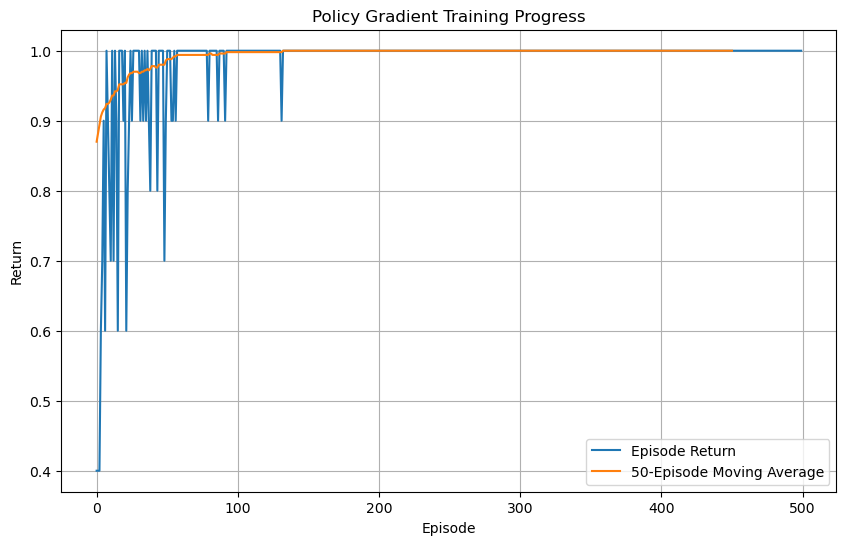

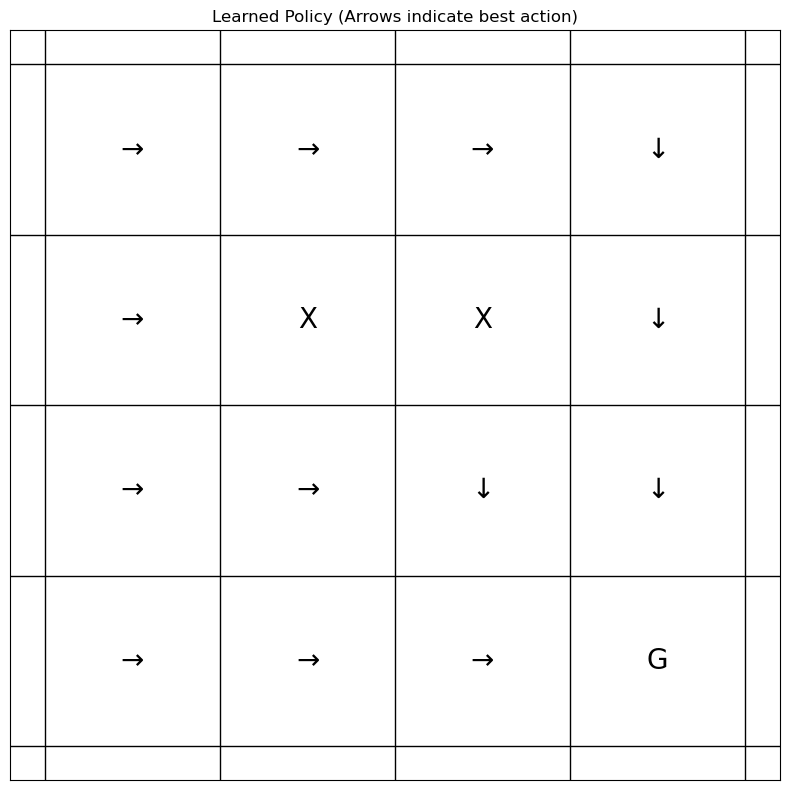

In [12]:
# Implementing REINFORCE (Policy Gradient) algorithm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical
import matplotlib.pyplot as plt

# Define a simple policy network
class PolicyNetwork(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim=128):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(state_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, action_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=-1)

def one_hot(state, state_dim):
    # Convert integer state to one-hot encoding
    encoding = np.zeros(state_dim)
    encoding[state] = 1.0
    return encoding

def reinforce(env, policy_network, optimizer, num_episodes=1000, gamma=0.99):
    episode_rewards = []
    
    for episode in range(num_episodes):
        state = env.reset()
        log_probs = []
        rewards = []
        done = False
        
        while not done:
            # Convert state to tensor
            state_tensor = torch.FloatTensor(one_hot(state, env.states))
            
            # Get action probabilities and sample action
            action_probs = policy_network(state_tensor)
            dist = Categorical(action_probs)
            action = dist.sample()
            
            # Take action in environment
            next_state, reward, done = env.step(action.item())
            
            # Store log probability and reward
            log_probs.append(dist.log_prob(action))
            rewards.append(reward)
            
            state = next_state
        
        # Calculate episode return
        episode_return = sum(rewards)
        episode_rewards.append(episode_return)
        
        # Calculate discounted returns
        returns = []
        G = 0
        for r in reversed(rewards):
            G = r + gamma * G
            returns.insert(0, G)
        returns = torch.FloatTensor(returns)
        
        # Normalize returns (reduces variance)
        if len(returns) > 1:
            returns = (returns - returns.mean()) / (returns.std() + 1e-9)
        
        # Calculate policy loss
        policy_loss = 0
        for log_prob, R in zip(log_probs, returns):
            policy_loss += -log_prob * R
        
        # Update policy
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()
        
        if episode % 50 == 0:
            print(f"Episode {episode}, Average Return: {np.mean(episode_rewards[-50:]):.2f}")
    
    return episode_rewards

# Define a function to visualize a direct policy grid
def visualize_direct_policy(policy, size=4):
    arrows = ['↑', '→', '↓', '←']
    
    fig, ax = plt.subplots(figsize=(8, 8))
    # Invert y-axis to make (0,0) the top-left corner, matching the grid world coordinates
    ax.invert_yaxis()
    
    for i in range(size):
        for j in range(size):
            if (i, j) in [(1, 1), (1, 2)]:  # obstacles
                ax.text(j + 0.5, i + 0.5, 'X', ha='center', va='center', fontsize=20)
            elif (i, j) == (size-1, size-1):  # goal
                ax.text(j + 0.5, i + 0.5, 'G', ha='center', va='center', fontsize=20)
            else:
                ax.text(j + 0.5, i + 0.5, arrows[policy[i, j]], ha='center', va='center', fontsize=20)
    
    # Grid lines
    for i in range(size + 1):
        ax.axhline(i, color='black', linewidth=1)
        ax.axvline(i, color='black', linewidth=1)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Learned Policy (Arrows indicate best action)')
    plt.tight_layout()
    plt.show()

# Run REINFORCE on our grid world
def run_policy_gradient_example():
    # Create environment
    env = SimpleGridWorld()
    
    # Create policy network and optimizer
    policy_net = PolicyNetwork(state_dim=env.states, action_dim=env.actions)
    optimizer = optim.Adam(policy_net.parameters(), lr=0.01)
    
    # Train with REINFORCE
    rewards = reinforce(env, policy_net, optimizer, num_episodes=500)
    
    # Plot rewards
    plt.figure(figsize=(10, 6))
    plt.plot(rewards)
    plt.plot(np.convolve(rewards, np.ones(50)/50, mode='valid'))
    plt.title('Policy Gradient Training Progress')
    plt.xlabel('Episode')
    plt.ylabel('Return')
    plt.legend(['Episode Return', '50-Episode Moving Average'])
    plt.grid(True)
    plt.show()
    
    # Visualize learned policy
    with torch.no_grad():
        policy = np.zeros((env.size, env.size), dtype=int)
        for i in range(env.size):
            for j in range(env.size):
                state = env._state_to_index((i, j))
                state_tensor = torch.FloatTensor(one_hot(state, env.states))
                probs = policy_net(state_tensor).numpy()
                policy[i, j] = np.argmax(probs)
        
    # Use the new function to visualize the policy directly
    visualize_direct_policy(policy)

# Uncomment to run the policy gradient example
run_policy_gradient_example()

### Setting up RL with TensorFlow Agents

TensorFlow Agents is a library for RL that provides implementations of many algorithms working with TensorFlow.

```python
import tensorflow as tf
from tf_agents.environments import suite_gym
from tf_agents.environments.tf_py_environment import TFPyEnvironment
from tf_agents.networks import q_network
from tf_agents.agents.dqn import dqn_agent
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common
from tf_agents.policies import random_tf_policy

# Create the environment
env_name = 'CartPole-v1'
py_env = suite_gym.load(env_name)
tf_env = TFPyEnvironment(py_env)

# Create a Q-Network
fc_layer_params = (100, 50)
q_net = q_network.QNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(),
    fc_layer_params=fc_layer_params)

# Create the DQN agent
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()

# Create a replay buffer
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=tf_env.batch_size,
    max_length=100000)

# Define a data collection policy
collect_policy = agent.collect_policy

# Sample data from the environment
def collect_step(environment, policy, buffer):
    time_step = environment.current_time_step()
    action_step = policy.action(time_step)
    next_time_step = environment.step(action_step.action)
    traj = trajectory.from_transition(time_step, action_step, next_time_step)
    buffer.add_batch(traj)
    return next_time_step

# Collect initial data
for _ in range(1000):
    collect_step(tf_env, random_tf_policy.RandomTFPolicy(
        tf_env.time_step_spec(), tf_env.action_spec()), replay_buffer)

# Train the agent
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3,
    sample_batch_size=64,
    num_steps=2).prefetch(3)

iterator = iter(dataset)

for _ in range(10000):
    experience, unused_info = next(iterator)
    train_loss = agent.train(experience).loss
    
    if train_step_counter.numpy() % 1000 == 0:
        print('step = {0}: loss = {1}'.format(train_step_counter.numpy(), train_loss))
```